In [2]:
import pandas as pd
import numpy as ny
import seaborn as sns
import mysql.connector
import requests

# CSV
customers = pd.read_csv(r"E:\Rnw\python\practical_exam\customers - customers.csv.csv")

# JSON
transactions = pd.read_json(r"E:\Rnw\python\practical_exam\transactions.json")

# SQL



conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="company_aiml"
)

query = "SELECT * FROM products"
products = pd.read_sql(query, conn)

print(products)


# API
response = requests.get("https://dummyjson.com/users")
api_data = pd.json_normalize(response.json()['users'])

# Merge datasets
df = customers.merge(transactions, on="customer_id", how="left")
df = df.merge(products, on="product_id", how="left")
df = df.merge(api_data, left_on="customer_id", right_on="id", how="left")

df.info()
df.describe()
df.head()


C:\Users\parth\AppData\Local\Temp\ipykernel_7864\3838488324.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products = pd.read_sql(query, conn)


  product_id       product_name            category  price  stock
0       P001          Earphones         Electronics    499     50
1       P002  Bluetooth Speaker               Audio    699     40
2       P003        Smart Watch            Wearable   1299     25
3       P004           Keyboard            Computer    899     60
4       P005         Headphones               Audio   1999     30
5       P006         Power Bank  Mobile Accessories   2599     20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 67 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   customer_id                      8 non-null      int64         
 1   name                             8 non-null      object        
 2   age_x                            8 non-null      int64         
 3   gender_x                         8 non-null      object        
 4   city              

,customer_id,name,age_x,gender_x,city,income,transaction_id,product_id,amount,payment_mode,...,company.address.city,company.address.state,company.address.stateCode,company.address.postalCode,company.address.coordinates.lat,company.address.coordinates.lng,company.address.country,crypto.coin,crypto.wallet,crypto.network
0,101,Aarav,24,Male,Mumbai,45000,T001,P001,499,UPI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102,Diya,30,Female,Delhi,55000,T007,P003,1499,Credit Card,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,Kabir,27,Male,Bangalore,48000,T002,P003,1299,Credit Card,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104,Meera,35,Female,Ahmedabad,60000,T003,P002,699,Debit Card,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105,Vivaan,40,Male,Pune,75000,T004,P005,1999,UPI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


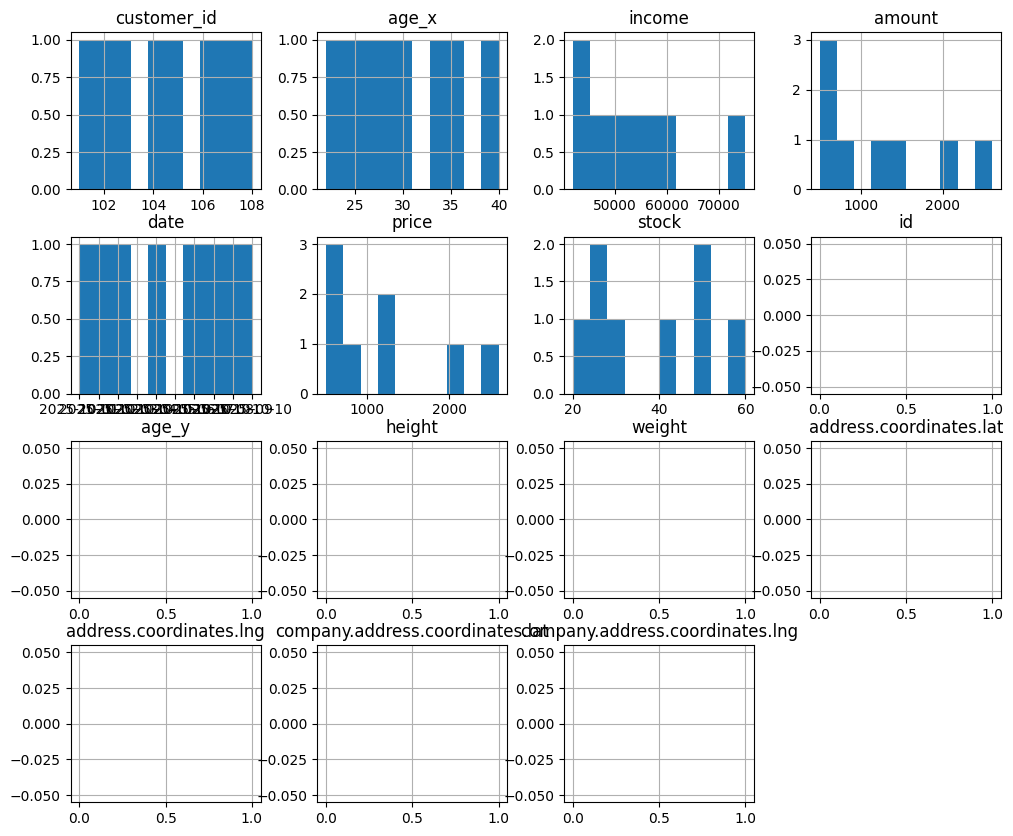

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12,10))
plt.show()


In [4]:
df.skew(numeric_only=True)


customer_id                        0.000000
age_x                              0.366520
income                             1.073956
amount                             0.813569
price                              0.960237
stock                              0.341565
id                                      NaN
age_y                                   NaN
height                                  NaN
weight                                  NaN
address.coordinates.lat                 NaN
address.coordinates.lng                 NaN
company.address.coordinates.lat         NaN
company.address.coordinates.lng         NaN
dtype: float64

In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file("eda_report.html")


e:\Rnw\dataprofiler\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 155.96it/s]


<Axes: >

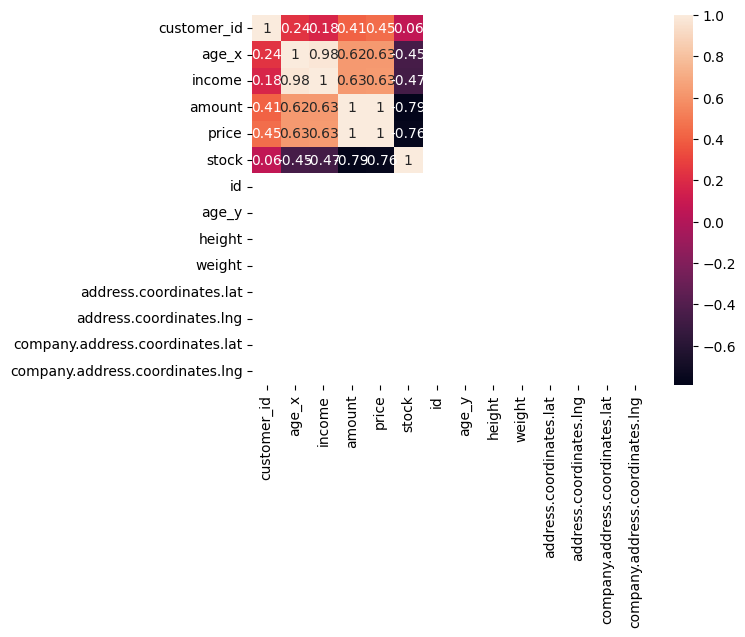

In [5]:
sns.boxplot(x="product_name", y="income", data=df)
sns.heatmap(df.corr(numeric_only=True), annot=True)


In [7]:
df.columns

Index(['customer_id', 'name', 'age_x', 'gender_x', 'city', 'income',
       'transaction_id', 'product_id', 'amount', 'payment_mode', 'date',
       'product_name', 'category', 'price', 'stock', 'id', 'firstName',
       'lastName', 'maidenName', 'age_y', 'gender_y', 'email', 'phone',
       'username', 'password', 'birthDate', 'image', 'bloodGroup', 'height',
       'weight', 'eyeColor', 'ip', 'macAddress', 'university', 'ein', 'ssn',
       'userAgent', 'role', 'hair.color', 'hair.type', 'address.address',
       'address.city', 'address.state', 'address.stateCode',
       'address.postalCode', 'address.coordinates.lat',
       'address.coordinates.lng', 'address.country', 'bank.cardExpire',
       'bank.cardNumber', 'bank.cardType', 'bank.currency', 'bank.iban',
       'company.department', 'company.name', 'company.title',
       'company.address.address', 'company.address.city',
       'company.address.state', 'company.address.stateCode',
       'company.address.postalCode', 'compa

In [6]:
columns_to_drop = [
     'id', 'firstName',
       'lastName', 'maidenName', 'age_y', 'gender_y', 'email', 'phone',
       'username', 'password', 'birthDate', 'image', 'bloodGroup', 'height',
       'weight', 'eyeColor', 'ip', 'macAddress', 'university', 'ein', 'ssn',
       'userAgent', 'role', 'hair.color', 'hair.type', 'address.address',
       'address.city', 'address.state', 'address.stateCode',
       'address.postalCode', 'address.coordinates.lat',
       'address.coordinates.lng', 'address.country', 'bank.cardExpire',
       'bank.cardNumber', 'bank.cardType', 'bank.currency', 'bank.iban',
       'company.department', 'company.name', 'company.title',
       'company.address.address', 'company.address.city',
       'company.address.state', 'company.address.stateCode',
       'company.address.postalCode', 'company.address.coordinates.lat',
       'company.address.coordinates.lng', 'company.address.country',
       'crypto.coin', 'crypto.wallet', 'crypto.network'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [7]:
df.head()

,customer_id,name,age_x,gender_x,city,income,transaction_id,product_id,amount,payment_mode,date,product_name,category,price,stock
0,101,Aarav,24,Male,Mumbai,45000,T001,P001,499,UPI,2025-10-01,Earphones,Electronics,499,50
1,102,Diya,30,Female,Delhi,55000,T007,P003,1499,Credit Card,2025-10-09,Smart Watch,Wearable,1299,25
2,103,Kabir,27,Male,Bangalore,48000,T002,P003,1299,Credit Card,2025-10-02,Smart Watch,Wearable,1299,25
3,104,Meera,35,Female,Ahmedabad,60000,T003,P002,699,Debit Card,2025-10-03,Bluetooth Speaker,Audio,699,40
4,105,Vivaan,40,Male,Pune,75000,T004,P005,1999,UPI,2025-10-05,Headphones,Audio,1999,30


In [8]:
df.rename(columns={
    'age_x': 'age',
    'gender_x': 'gender'
}, inplace=True)


In [9]:
df.head()

,customer_id,name,age,gender,city,income,transaction_id,product_id,amount,payment_mode,date,product_name,category,price,stock
0,101,Aarav,24,Male,Mumbai,45000,T001,P001,499,UPI,2025-10-01,Earphones,Electronics,499,50
1,102,Diya,30,Female,Delhi,55000,T007,P003,1499,Credit Card,2025-10-09,Smart Watch,Wearable,1299,25
2,103,Kabir,27,Male,Bangalore,48000,T002,P003,1299,Credit Card,2025-10-02,Smart Watch,Wearable,1299,25
3,104,Meera,35,Female,Ahmedabad,60000,T003,P002,699,Debit Card,2025-10-03,Bluetooth Speaker,Audio,699,40
4,105,Vivaan,40,Male,Pune,75000,T004,P005,1999,UPI,2025-10-05,Headphones,Audio,1999,30


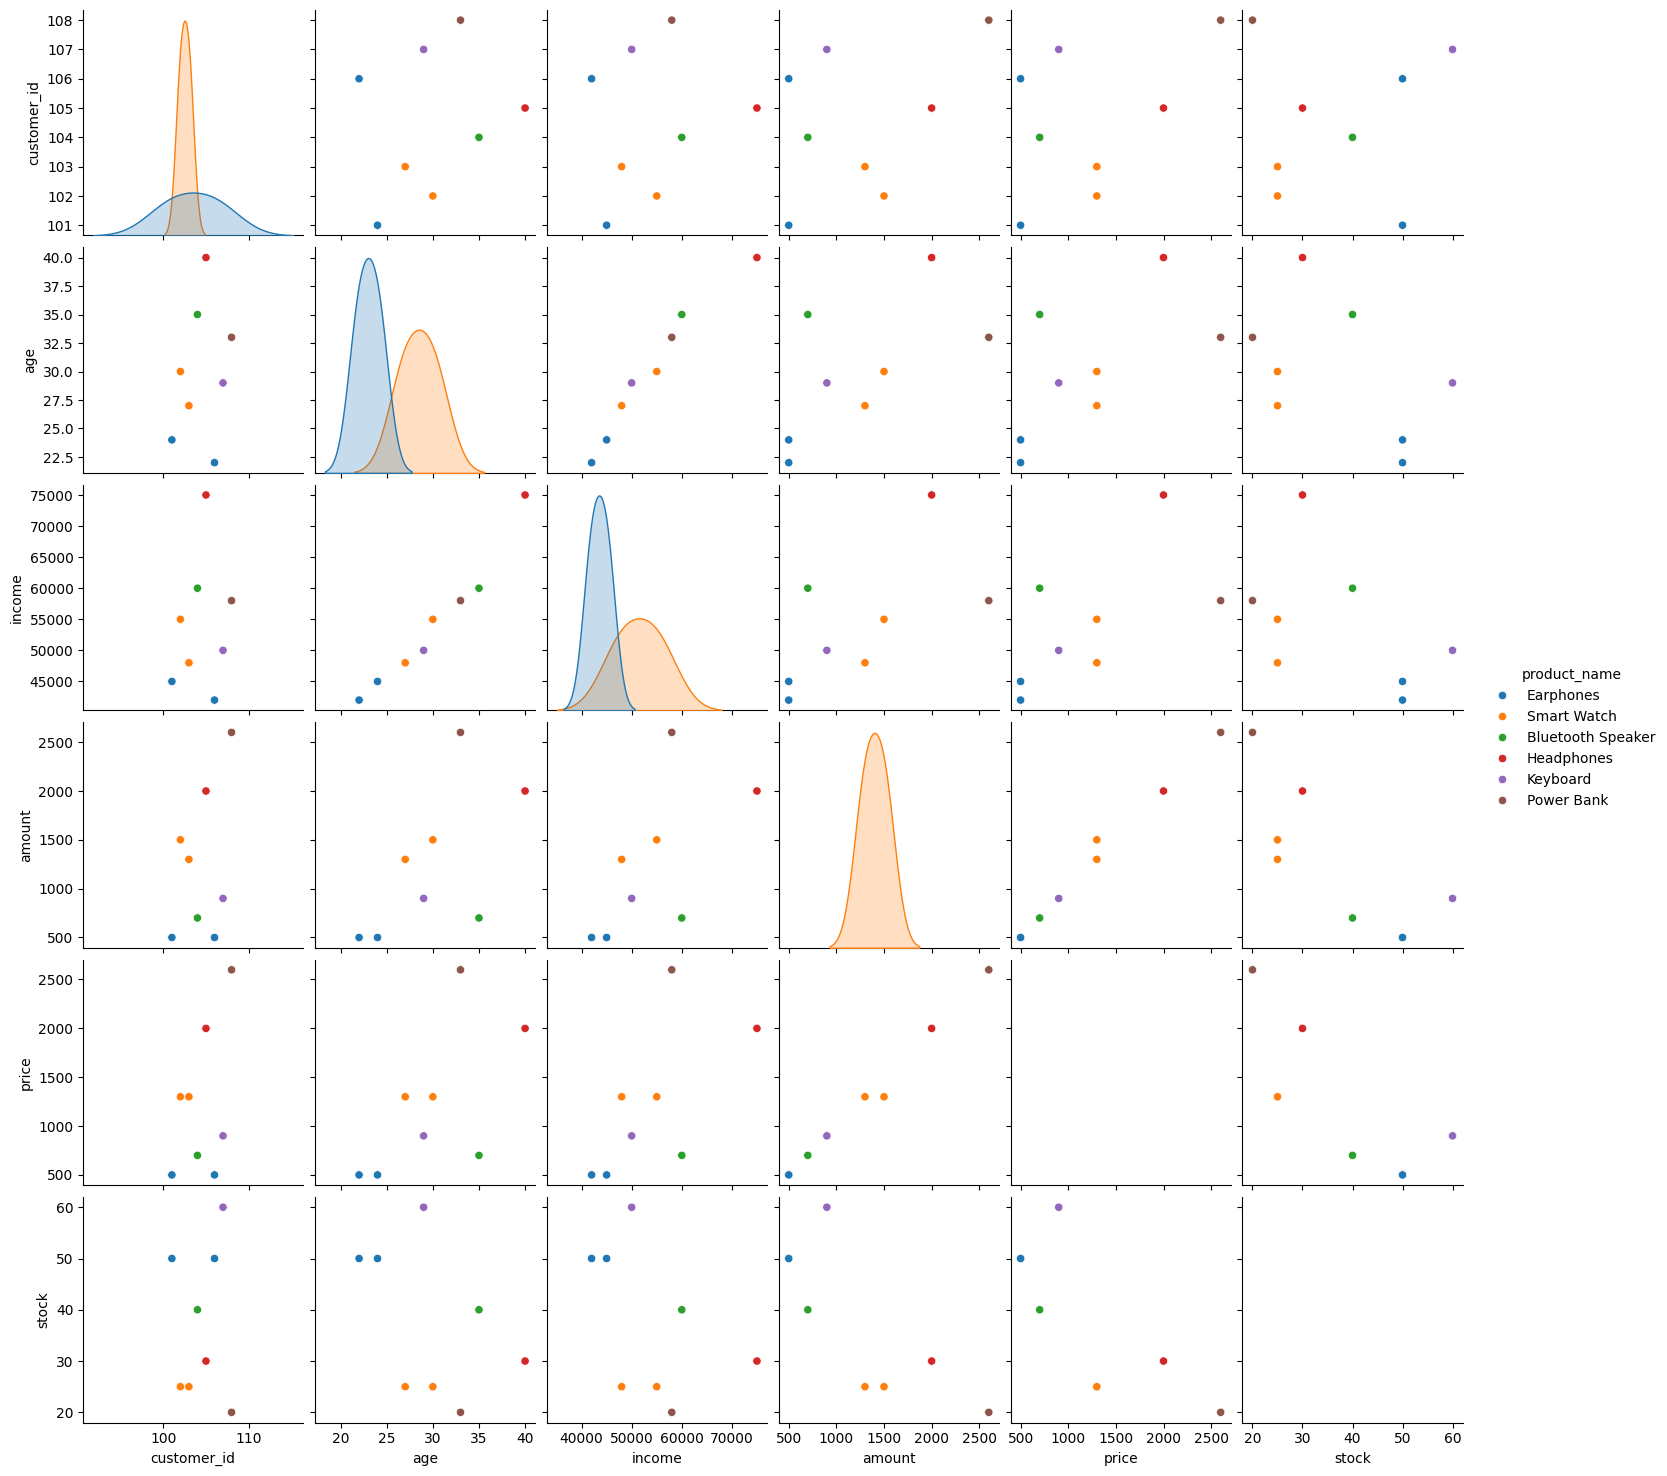

In [10]:
sns.pairplot(df, hue="product_name")


In [12]:
df.isnull().count()

customer_id       8
name              8
age               8
gender            8
city              8
income            8
transaction_id    8
product_id        8
amount            8
payment_mode      8
date              8
product_name      8
category          8
price             8
stock             8
dtype: int64